### Macy's Data Challenge November 2020

#### **Business Context**:
To enable better demand forecasting, our team creates “seasonal profiles” for our products. Seasonal profiles can be thought of as a way to model fluctuations in demand across the year. For example, swimwear sales take place mostly in the summer months, and therefore a seasonal profile for swimwear should peak mid-year. There are multiple strategies to create seasonal profiles, and your task in this problem is to evaluate a few seasonal profiles created by different strategies (based on 2018 data), and see which ones perform best on a validation set (2019 data). The following prompts will guide you through the evaluation process. You will need to repeat the evaluation process for all three given strategies.

#### **Instructions**:

There are 4 data files for this python question, one is sales data in 2019, and another three are pre-made seasonal profiles based on 2018 data using different strategies. Please complete this exercise in a Jupyter notebook (please make a note if not using Python 3). Create a section corresponding to each of the 1-8 numbered prompts below, and a section to answer the questions in the QUESTIONS section. Similar to the SQL questions, save your jupyter notebook as {code_name}_python.ipynb (e.g. CharterClub_python.ipynb). Do not indicate your name in the file body – remember, if you load data from a filepath your name is often included, so please try to scrub the notebook.

In [21]:
import numpy
import pandas as pd
import matplotlib
%matplotlib inline


In [7]:
pd.set_option('display.max_columns', None)

### 1) Load data from 'sales_data_2019.csv' file

Features: 
* product_id: product_0 - product_3
* class: 1 or 2
* location: 0-9
* climate: COOL or WARM
* week: wk_01 - wk_52
* sales_units:

In [13]:
df_validation = pd.read_csv("./sales_data_2019.csv")

In [16]:
df_validation.head()

,product_id,class,location,climate,week,sales_units
0,product_0,1,0,WARM,wk_01,104
1,product_0,1,0,WARM,wk_02,111
2,product_0,1,0,WARM,wk_03,116
3,product_0,1,0,WARM,wk_04,68
4,product_0,1,0,WARM,wk_05,79


In [17]:
df_validation.shape

(2080, 6)

In [18]:
# Check for null values
df_validation.isnull().sum()

product_id     0
class          0
location       0
climate        0
week           0
sales_units    0
dtype: int64

In [19]:
df_validation.describe()

,class,location,sales_units
count,2080.00000,2080.000000,2080.000000
mean,1.50000,4.500000,90.015385
std,0.50012,2.872972,69.384768
min,1.00000,0.000000,1.000000
25%,1.00000,2.000000,34.000000
50%,1.50000,4.500000,70.000000
75%,2.00000,7.000000,131.250000
max,2.00000,9.000000,385.000000


In [20]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   2080 non-null   object
 1   class        2080 non-null   int64 
 2   location     2080 non-null   int64 
 3   climate      2080 non-null   object
 4   week         2080 non-null   object
 5   sales_units  2080 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 97.6+ KB


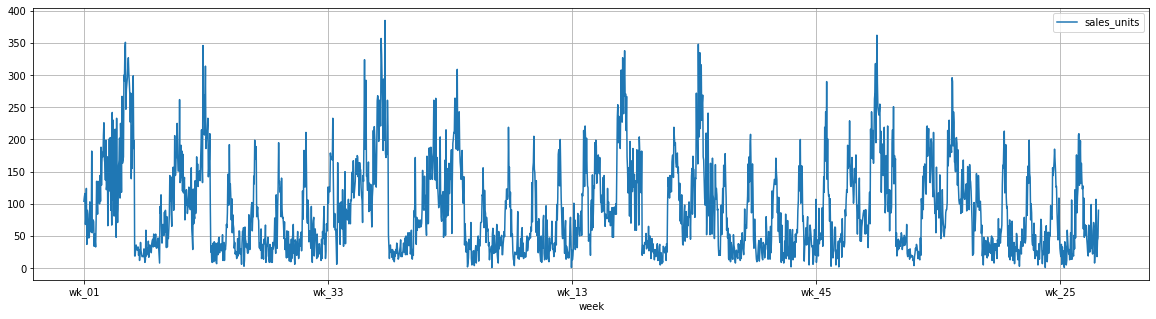

In [31]:
df_validation.plot('week','sales_units',grid=True,figsize=(20,5))

###2) Load the pre-made seasonal profiles

In [32]:
sp_prod_loc = pd.read_csv("./sp_prod_loc.csv")

In [33]:
sp_prod_clim = pd.read_csv("./sp_prod_clim.csv")

In [34]:
sp_class_clim = pd.read_csv("./sp_class_clim.csv")

In [35]:
print(sp_prod_loc.head())
print(sp_prod_loc.shape)

  seasonal_profile_id product_id  location  class   week  seasonality_value
0  ProdLoc1            product_0  0         1      wk_01  0.727476         
1  ProdLoc1            product_0  0         1      wk_02  0.960269         
2  ProdLoc1            product_0  0         1      wk_03  0.843872         
3  ProdLoc1            product_0  0         1      wk_04  1.474352         
4  ProdLoc1            product_0  0         1      wk_05  0.339489         
(2080, 6)


In [36]:
print(sp_prod_clim.head())
print(sp_prod_clim.shape)

  seasonal_profile_id product_id climate  class  location   week  \
0  ProdClim1           product_0  COOL    1      7         wk_01   
1  ProdClim1           product_0  COOL    1      7         wk_02   
2  ProdClim1           product_0  COOL    1      7         wk_03   
3  ProdClim1           product_0  COOL    1      7         wk_04   
4  ProdClim1           product_0  COOL    1      7         wk_05   

   seasonality_value  
0  0.467086           
1  0.514818           
2  0.644375           
3  0.548912           
4  0.415945           
(416, 7)


In [37]:
print(sp_class_clim.head())
print(sp_class_clim.shape)

  seasonal_profile_id  class climate  location   week  seasonality_value
0  ClassClim1          1      COOL    7         wk_01  0.523652         
1  ClassClim1          1      COOL    7         wk_02  0.478866         
2  ClassClim1          1      COOL    7         wk_03  0.594276         
3  ClassClim1          1      COOL    7         wk_04  0.504704         
4  ClassClim1          1      COOL    7         wk_05  0.454750         
(208, 6)


### 3) Calculate **'average weekly sales units'** for each product_id and location combo

In [66]:
product_location = df_validation.groupby(['product_id','location']).agg({'sales_units':'sum'})
product_location.head()

sales_units
product_id location             
product_0  0         5699       
           1         10430      
           2         1560       
           3         6032       
           4         7675

In [67]:
avg_weekly_sales_units = product_location['sales_units'].div(52)
avg_weekly_sales_units.head()

product_id  location
product_0   0           109.596154
            1           200.576923
            2           30.000000 
            3           116.000000
            4           147.596154
Name: sales_units, dtype: float64

In [73]:
df_validation = df_validation.merge(avg_weekly_sales_units, on=['product_id','location'])
df_validation.head()

,product_id,class,location,climate,week,sales_units_x,sales_units_y,sales_units
0,product_0,1,0,WARM,wk_01,104,109.596154,109.596154
1,product_0,1,0,WARM,wk_02,111,109.596154,109.596154
2,product_0,1,0,WARM,wk_03,116,109.596154,109.596154
3,product_0,1,0,WARM,wk_04,68,109.596154,109.596154
4,product_0,1,0,WARM,wk_05,79,109.596154,109.596154


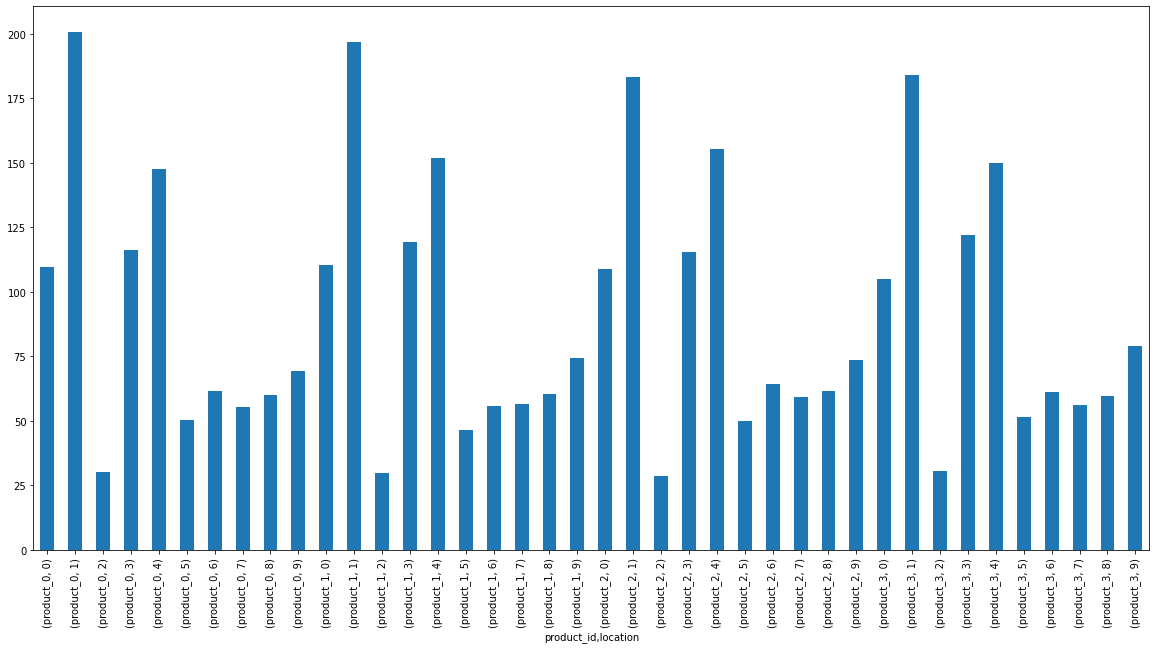

In [69]:
avg_weekly_sales_units.plot(kind='bar', figsize=(20,10))

## Seasonal Profile Data 1: sp_prod_loc

### 4) Pandas merge seasonal profile and sales data for 2019

In [74]:
merged_profile1 = df_validation.merge(sp_prod_loc, how='inner', left_on=['product_id', 'location'], right_on=['product_id','location'])

In [75]:
merged_profile1.head()

,product_id,class_x,location,climate,week_x,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,class_y,week_y,seasonality_value
0,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_01,0.727476
1,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_02,0.960269
2,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_03,0.843872
3,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_04,1.474352
4,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_05,0.339489


### 5) Calculate demand forecast for every product id and location combo


In [78]:
merged_profile1['forecasted_sales'] = merged_profile1['sales_units'] * merged_profile1['seasonality_value']

###6) Values for every week 

In [80]:
merged_profile1.head()

,product_id,class_x,location,climate,week_x,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,class_y,week_y,seasonality_value,forecasted_sales
0,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_01,0.727476,79.728595
1,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_02,0.960269,105.241746
2,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_03,0.843872,92.485171
3,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_04,1.474352,161.583287
4,product_0,1,0,WARM,wk_01,104,109.596154,109.596154,ProdLoc1,1,wk_05,0.339489,37.206678


### 7) SMAPE Values

In [88]:
smape_profile1 = merged_profile1.groupby(['product_id','location']).agg({'sales_units_x':'sum', 'forecasted_sales':'sum'})

In [90]:
smape_profile1.head()

sales_units_x  forecasted_sales
product_id location                                 
product_0  0         296348         296348.000000   
           1         542360         542360.000021   
           2         81120          81120.000002    
           3         313664         313663.999988   
           4         399100         399100.000008

In [91]:
smape_profile1['smape_value'] = abs(smape_profile1['forecasted_sales'] - smape_profile1['sales_units_x'])/(abs(smape_profile1['sales_units_x']) + abs(smape_profile1['forecasted_sales']))

In [99]:
smape_profile1['smape_value'] = smape_profile1['smape_value']/52

In [100]:
smape_profile1 = smape_profile1.sort_values(['smape_value'], ascending=True)

In [101]:
smape_profile1.head()

,,sales_units_x,forecasted_sales,smape_value
product_id,location,,,
product_0,0,296348,296348.0,1.133173e-17
product_2,5,135252,135252.0,1.655248e-17
product_0,5,136344,136344.0,2.873484e-17
product_3,1,497068,497068.0,3.490541e-17
product_1,3,322764,322764.0,3.641506e-17


## Seasonal Profile Data 2: sp_prod_clim

In [116]:
#4) Merge

merged_profile2 = df_validation.merge(sp_prod_clim, how='inner', left_on=['product_id', 'climate','location','week'], right_on=['product_id','climate','location','week'])
merged_profile2.head()

,product_id,class_x,location,climate,week,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,class_y,seasonality_value
0,product_0,1,2,WARM,wk_01,19,30.0,30.0,ProdClim2,1,1.015197
1,product_0,1,2,WARM,wk_02,19,30.0,30.0,ProdClim2,1,0.869199
2,product_0,1,2,WARM,wk_03,31,30.0,30.0,ProdClim2,1,0.862408
3,product_0,1,2,WARM,wk_04,36,30.0,30.0,ProdClim2,1,0.892966
4,product_0,1,2,WARM,wk_05,32,30.0,30.0,ProdClim2,1,0.563621


In [120]:
#5) Calculate demand forecast values

merged_profile2['forecasted_sales'] = merged_profile2['sales_units'] * merged_profile2['seasonality_value']

In [121]:
#6) Values for every week

merged_profile2.head()

,product_id,class_x,location,climate,week,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,class_y,seasonality_value,forecasted_sales
0,product_0,1,2,WARM,wk_01,19,30.0,30.0,ProdClim2,1,1.015197,30.455918
1,product_0,1,2,WARM,wk_02,19,30.0,30.0,ProdClim2,1,0.869199,26.075970
2,product_0,1,2,WARM,wk_03,31,30.0,30.0,ProdClim2,1,0.862408,25.872252
3,product_0,1,2,WARM,wk_04,36,30.0,30.0,ProdClim2,1,0.892966,26.788985
4,product_0,1,2,WARM,wk_05,32,30.0,30.0,ProdClim2,1,0.563621,16.908637


In [123]:
#7) SMAPE Values
smape_profile2 = merged_profile2.groupby(['product_id','location']).agg({'sales_units':'sum', 'forecasted_sales':'sum'})
smape_profile2['smape_value'] = abs(smape_profile2['forecasted_sales'] - smape_profile2['sales_units'])/(abs(smape_profile2['sales_units']) + abs(smape_profile2['forecasted_sales']))
smape_profile2['smape_value'] = smape_profile2['smape_value']/52
smape_profile2 = smape_profile2.sort_values(['smape_value'], ascending=True)

In [125]:
smape_profile2.head()

sales_units  forecasted_sales   smape_value
product_id location                                             
product_1  7         2933.0       2933.0            2.981637e-18
product_2  2         1498.0       1498.0            4.378409e-18
product_0  7         2872.0       2872.0            1.849132e-13
           2         1560.0       1560.0            1.849163e-13
product_3  7         2913.0       2913.0            3.698282e-13

## Seasonal Profile Data 3: sp_class_clim

In [128]:
#4) Merge

merged_profile3 = df_validation.merge(sp_class_clim, how='inner', left_on=['climate','location','week','class'], right_on=['climate','location','week','class'])
merged_profile3.head()

,product_id,class,location,climate,week,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,seasonality_value
0,product_0,1,2,WARM,wk_01,19,30.000000,30.000000,ClassClim2,1.036028
1,product_1,1,2,WARM,wk_01,52,29.884615,29.884615,ClassClim2,1.036028
2,product_0,1,2,WARM,wk_02,19,30.000000,30.000000,ClassClim2,0.975185
3,product_1,1,2,WARM,wk_02,34,29.884615,29.884615,ClassClim2,0.975185
4,product_0,1,2,WARM,wk_03,31,30.000000,30.000000,ClassClim2,0.856033


In [129]:
#5) Calculate demand forecast values

merged_profile3['forecasted_sales'] = merged_profile3['sales_units_x'] * merged_profile3['seasonality_value']

In [130]:
#6) Values for every week

merged_profile3.head()

,product_id,class,location,climate,week,sales_units_x,sales_units_y,sales_units,seasonal_profile_id,seasonality_value,forecasted_sales
0,product_0,1,2,WARM,wk_01,19,30.000000,30.000000,ClassClim2,1.036028,19.684537
1,product_1,1,2,WARM,wk_01,52,29.884615,29.884615,ClassClim2,1.036028,53.873470
2,product_0,1,2,WARM,wk_02,19,30.000000,30.000000,ClassClim2,0.975185,18.528512
3,product_1,1,2,WARM,wk_02,34,29.884615,29.884615,ClassClim2,0.975185,33.156285
4,product_0,1,2,WARM,wk_03,31,30.000000,30.000000,ClassClim2,0.856033,26.537028


In [131]:
#7) SMAPE Values
smape_profile3 = merged_profile3.groupby(['product_id','location']).agg({'sales_units_x':'sum', 'forecasted_sales':'sum'})
smape_profile3['smape_value'] = abs(smape_profile3['forecasted_sales'] - smape_profile3['sales_units_x'])/(abs(smape_profile3['sales_units_x']) + abs(smape_profile3['forecasted_sales']))
smape_profile3['smape_value'] = smape_profile3['smape_value']/52
smape_profile3 = smape_profile3.sort_values(['smape_value'], ascending=True)

In [132]:
smape_profile3.head()

,,sales_units_x,forecasted_sales,smape_value
product_id,location,,,
product_0,2,1560,1654.240546,0.000564
product_1,2,1554,1651.979199,0.000588
product_2,2,1498,1609.301445,0.000689
product_3,2,1587,1729.050309,0.000824
product_0,7,2872,4068.035378,0.003314


## 8) Summarize the values

In [133]:
smape_profile1.head()

,,sales_units_x,forecasted_sales,smape_value
product_id,location,,,
product_0,0,296348,296348.0,1.133173e-17
product_2,5,135252,135252.0,1.655248e-17
product_0,5,136344,136344.0,2.873484e-17
product_3,1,497068,497068.0,3.490541e-17
product_1,3,322764,322764.0,3.641506e-17


In [134]:
smape_profile2.head()

sales_units  forecasted_sales   smape_value
product_id location                                             
product_1  7         2933.0       2933.0            2.981637e-18
product_2  2         1498.0       1498.0            4.378409e-18
product_0  7         2872.0       2872.0            1.849132e-13
           2         1560.0       1560.0            1.849163e-13
product_3  7         2913.0       2913.0            3.698282e-13

In [136]:
smape_profile3.head()

,,sales_units_x,forecasted_sales,smape_value
product_id,location,,,
product_0,2,1560,1654.240546,0.000564
product_1,2,1554,1651.979199,0.000588
product_2,2,1498,1609.301445,0.000689
product_3,2,1587,1729.050309,0.000824
product_0,7,2872,4068.035378,0.003314


## Questions

1)	Which seasonal profile strategy do you think resulted in the best seasonal profiles?
  * My intuition is the seasonal profile strategy devised based on climate resulted in the seasonal profile which resulted in comparatively lower SMAPE error values \\

2)	What do you notice about the three strategies for calculating seasonal profiles?
  * The strategies were devised based on the Key Performance Indiators(KPI) which adds significant impact to implementing the demand forecasting model

